### FINAL PROJECT
#### GROUP MEMBERS: DHRUTI RADADIYA AND VIDHI PUROHIT

##### How did the COVID-19 pandemic impact ABC Company’s parcel business?

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
# Load the dataset
covid_data = pd.read_csv('COVID_Parcel_Business.csv')

In [37]:
# Inspect the dataset
print("Dataset Head:\n", covid_data.head())
print("\nDataset Info:\n")
covid_data.info()

Dataset Head:
    FakeCustomerID  THE_YEAR  THE_WEEK  VOLUME
0          718117      2021         1       8
1          718117      2020         7     257
2          718117      2019        39     141
3          718117      2018         1      14
4          718117      2021         2     192

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190719 entries, 0 to 190718
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   FakeCustomerID  190719 non-null  int64
 1   THE_YEAR        190719 non-null  int64
 2   THE_WEEK        190719 non-null  int64
 3   VOLUME          190719 non-null  int64
dtypes: int64(4)
memory usage: 5.8 MB


   THE_YEAR    VOLUME
0      2018  49099478
1      2019  52823114
2      2020  73475690
3      2021  48679668


C:\Users\HP\AppData\Local\Temp\ipykernel_12720\572010128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_data, x='THE_YEAR', y='VOLUME', palette='viridis')


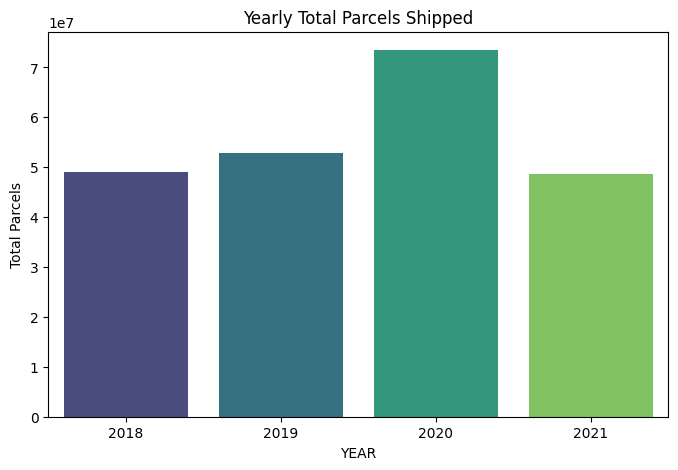

In [38]:
# Aggregate parcels by year
yearly_data = covid_data.groupby('THE_YEAR')['VOLUME'].sum().reset_index()
print(yearly_data)
# Plot year-wise total parcels shipped
plt.figure(figsize=(8, 5))
sns.barplot(data=yearly_data, x='THE_YEAR', y='VOLUME', palette='viridis')
plt.title('Yearly Total Parcels Shipped')
plt.xlabel('YEAR')
plt.ylabel('Total Parcels')
plt.show()

     THE_YEAR  THE_WEEK   VOLUME
0        2018         1   817751
1        2018         2   925839
2        2018         3   854760
3        2018         4   800040
4        2018         5   812249
..        ...       ...      ...
193      2021        35  1108902
194      2021        36  1102781
195      2021        37  1066316
196      2021        38  1026181
197      2021        39  1188099

[198 rows x 3 columns]


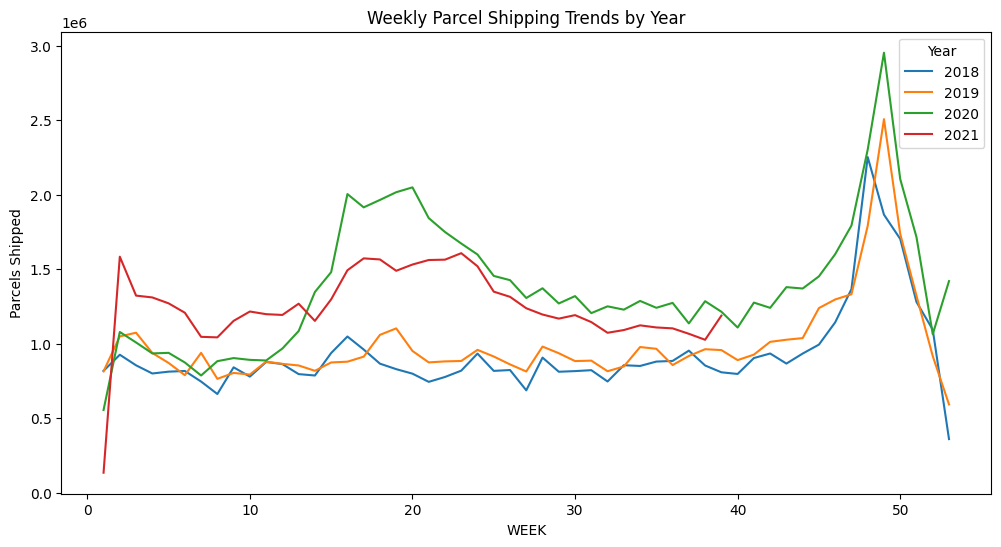

In [39]:
# Analyze weekly trends
weekly_data = covid_data.groupby(['THE_YEAR', 'THE_WEEK'])['VOLUME'].sum().reset_index()
print(weekly_data)

# Plot weekly trends for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_data, x='THE_WEEK', y='VOLUME', hue='THE_YEAR', palette='tab10')
plt.title('Weekly Parcel Shipping Trends by Year')
plt.xlabel('WEEK')
plt.ylabel('Parcels Shipped')
plt.legend(title='Year')
plt.show()

     THE_YEAR  THE_WEEK   VOLUME
117      2020        12   967436
118      2020        13  1084829
119      2020        14  1346802
120      2020        15  1480147
121      2020        16  2003866
122      2020        17  1914740
123      2020        18  1964582
124      2020        19  2016316
125      2020        20  2048931
126      2020        21  1842820
127      2020        22  1749399
128      2020        23  1672111
129      2020        24  1598331
130      2020        25  1454647
131      2020        26  1426303
132      2020        27  1306604
133      2020        28  1371776
134      2020        29  1269835
135      2020        30  1319267
136      2020        31  1205036
137      2020        32  1250590
138      2020        33  1228359
139      2020        34  1286856
140      2020        35  1240796
141      2020        36  1273737
142      2020        37  1135972
143      2020        38  1285061
144      2020        39  1214387
145      2020        40  1108258
146      2

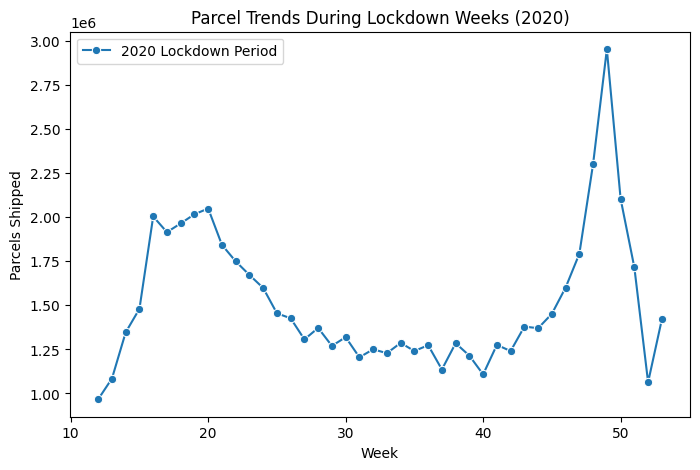

In [40]:
# Highlight significant weeks lockdown weeks
# Assuming lockdown started around March 2020 (Week 12)
lockdown_weeks = weekly_data[(weekly_data['THE_YEAR'] == 2020) & (weekly_data['THE_WEEK'] >= 12)]
print(lockdown_weeks)

plt.figure(figsize=(8, 5))
sns.lineplot(data=lockdown_weeks, x='THE_WEEK', y='VOLUME', marker='o', label='2020 Lockdown Period')
plt.title('Parcel Trends During Lockdown Weeks (2020)')
plt.xlabel('Week')
plt.ylabel('Parcels Shipped')
plt.legend()
plt.show()

Industry Standard Growth Rate: 11.40%
Growth Rate During COVID Period: 302.60%


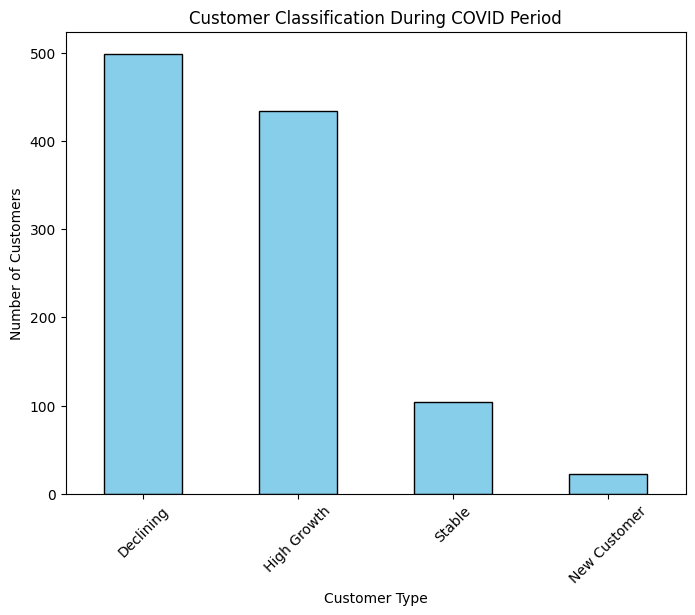


Summary of Parcels Shipped by Customer Type:
 Customer_Type
Declining       19347493.0
High Growth     34115960.0
New Customer      156716.0
Stable           5236504.0
Name: Parcels_Shipped_COVID, dtype: float64


In [41]:
# Renaming columns for consistency
covid_data.rename(columns={'FakeCustomerID': 'CustomerID', 'THE_YEAR': 'Year', 'THE_WEEK': 'Week', 'VOLUME': 'Parcels_Shipped'}, inplace=True)

# Define pre-COVID and COVID observation periods
PRE_COVID_WEEKS = list(range(1, 16))  # Weeks 1 to 15
COVID_START_WEEK = 16  # Define as per timeline provided

# Filter data for pre-COVID and COVID periods
pre_covid_2019 = covid_data[(covid_data['Year'] == 2019) & (covid_data['Week'].isin(PRE_COVID_WEEKS))]
pre_covid_2020 = covid_data[(covid_data['Year'] == 2020) & (covid_data['Week'].isin(PRE_COVID_WEEKS))]
covid_period_2020 = covid_data[(covid_data['Year'] == 2020) & (covid_data['Week'] >= COVID_START_WEEK)]

# Aggregate parcel volumes by year
total_pre_covid_2019 = pre_covid_2019['Parcels_Shipped'].sum()
total_pre_covid_2020 = pre_covid_2020['Parcels_Shipped'].sum()

# Calculate ISGR
isgr = ((total_pre_covid_2020 - total_pre_covid_2019) / total_pre_covid_2019) * 100
print(f"Industry Standard Growth Rate: {isgr:.2f}%")

# Analyze growth during COVID
total_covid_2020 = covid_period_2020['Parcels_Shipped'].sum()
covid_growth_rate = ((total_covid_2020 - total_pre_covid_2020) / total_pre_covid_2020) * 100
print(f"Growth Rate During COVID Period: {covid_growth_rate:.2f}%")

# Classify customers
# Aggregate parcel volumes by CustomerID for classification
customer_2019 = pre_covid_2019.groupby('CustomerID')['Parcels_Shipped'].sum().reset_index()
customer_2020 = pre_covid_2020.groupby('CustomerID')['Parcels_Shipped'].sum().reset_index()
customer_covid_2020 = covid_period_2020.groupby('CustomerID')['Parcels_Shipped'].sum().reset_index()

# Merge datasets
customer_comparison = pd.merge(customer_2019, customer_2020, on='CustomerID', how='outer', suffixes=('_2019', '_2020')).fillna(0)
customer_comparison = pd.merge(customer_comparison, customer_covid_2020, on='CustomerID', how='outer').fillna(0)
customer_comparison.rename(columns={'Parcels_Shipped': 'Parcels_Shipped_COVID'}, inplace=True)

# Calculate growth rates for each customer
customer_comparison['Growth_Rate'] = ((customer_comparison['Parcels_Shipped_2020'] - customer_comparison['Parcels_Shipped_2019']) /
                                      customer_comparison['Parcels_Shipped_2019'].replace(0, 1)) * 100

def classify_customer(row):
    if row['Parcels_Shipped_2019'] == 0 and row['Parcels_Shipped_2020'] > 0:
        return 'New Customer'
    elif row['Growth_Rate'] > isgr:
        return 'High Growth'
    elif 0 <= row['Growth_Rate'] <= isgr:
        return 'Stable'
    elif row['Growth_Rate'] < 0:
        return 'Declining'
    elif row['Parcels_Shipped_COVID'] == 0 and row['Parcels_Shipped_2019'] > 0:
        return 'Lost Customer'
    return 'Unclassified'

customer_comparison['Customer_Type'] = customer_comparison.apply(classify_customer, axis=1)

# Visualize customer classification
plt.figure(figsize=(8, 6))
customer_comparison['Customer_Type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer Classification During COVID Period')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

#  Summarize results
summary = customer_comparison.groupby('Customer_Type')['Parcels_Shipped_COVID'].sum()
print("\nSummary of Parcels Shipped by Customer Type:\n", summary)

### Additional Business Questions:
##### •	When were customer volumes first impacted by COVID-19?

First impact observed in Week 1 with a percentage change of -31.85%.


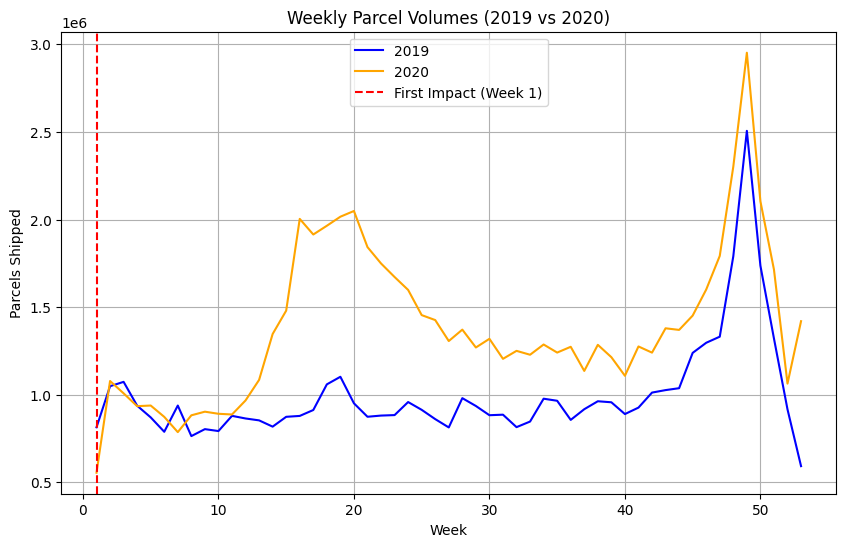

In [42]:
# Aggregate weekly volumes for 2019 and 2020
weekly_data = covid_data.groupby(['Year', 'Week'])['Parcels_Shipped'].sum().reset_index()

# Separate data for 2019 and 2020
weekly_2019 = weekly_data[weekly_data['Year'] == 2019].set_index('Week')['Parcels_Shipped']
weekly_2020 = weekly_data[weekly_data['Year'] == 2020].set_index('Week')['Parcels_Shipped']

# Align the data for comparison
weekly_comparison = pd.DataFrame({'2019': weekly_2019, '2020': weekly_2020}).fillna(0)

# Calculate week-on-week change
weekly_comparison['Difference'] = weekly_comparison['2020'] - weekly_comparison['2019']
weekly_comparison['Percentage_Change'] = (weekly_comparison['Difference'] / weekly_comparison['2019'].replace(0, 1)) * 100

# Identify the first week with significant change
threshold = 10  # Define a threshold for significant change (e.g., ±10% difference)
first_impact_week = weekly_comparison[weekly_comparison['Percentage_Change'].abs() > threshold].iloc[0]
print(f"First impact observed in Week {first_impact_week.name} with a percentage change of {first_impact_week['Percentage_Change']:.2f}%.")

# Visualize weekly trends
plt.figure(figsize=(10, 6))
plt.plot(weekly_comparison.index, weekly_comparison['2019'], label='2019', color='blue')
plt.plot(weekly_comparison.index, weekly_comparison['2020'], label='2020', color='orange')
plt.axvline(x=first_impact_week.name, color='red', linestyle='--', label=f'First Impact (Week {first_impact_week.name})')
plt.title('Weekly Parcel Volumes (2019 vs 2020)')
plt.xlabel('Week')
plt.ylabel('Parcels Shipped')
plt.legend()
plt.grid()
plt.show()


##### •	What events within the COVID timeline may have contributed to the change?

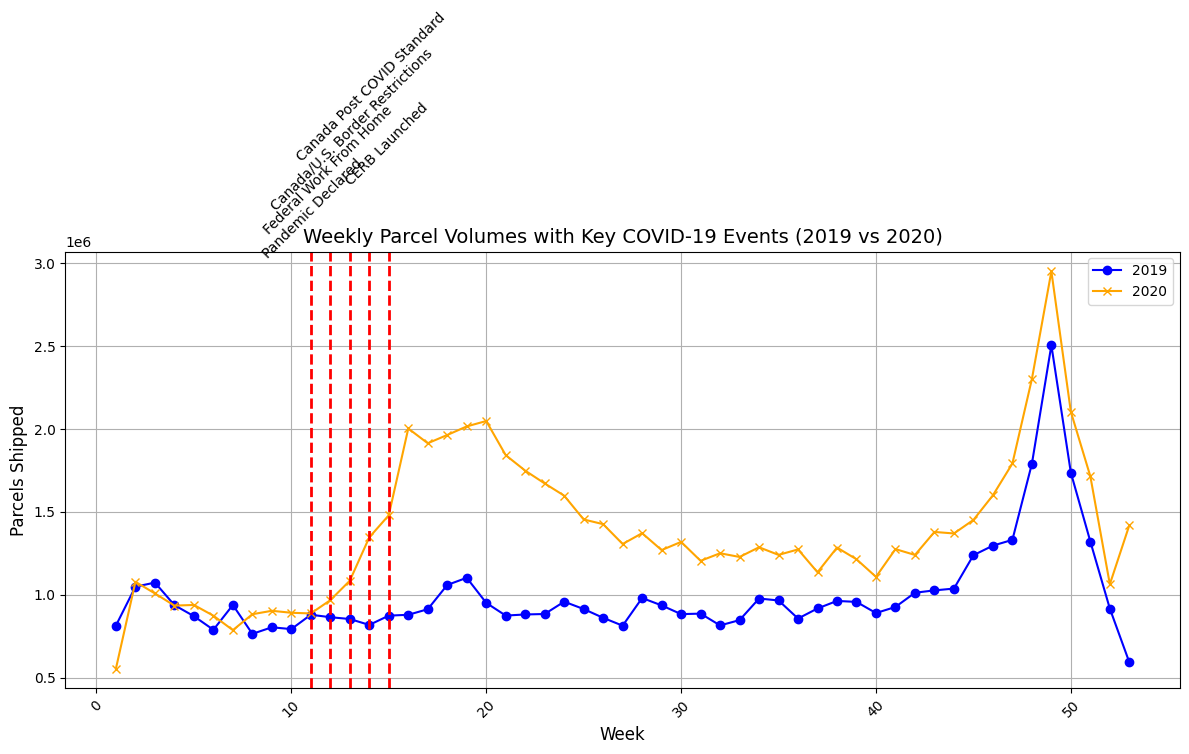

In [43]:
# Plot weekly parcel volumes
plt.figure(figsize=(12, 8))
plt.plot(weekly_comparison.index, weekly_comparison['2019'], label='2019', color='blue', linestyle='-', marker='o')
plt.plot(weekly_comparison.index, weekly_comparison['2020'], label='2020', color='orange', linestyle='-', marker='x')

# Mark significant events with vertical lines and annotations
events = {
    "Mar 11, 2020": "Pandemic Declared",
    "Mar 16, 2020": "Federal Work From Home",
    "Mar 18, 2020": "Canada/U.S. Border Restrictions",
    "Apr 6, 2020": "CERB Launched",
    "Mar 23, 2020": "Canada Post COVID Standard",
}

# Define the week numbers for these events (based on the timeline provided)
event_weeks = {
    "Mar 11, 2020": 11,  # Week 11
    "Mar 16, 2020": 12,  # Week 12
    "Mar 18, 2020": 13,  # Week 13
    "Apr 6, 2020": 15,   # Week 15
    "Mar 23, 2020": 14   # Week 14
}

# Add vertical lines for each event and annotate with adjusted positioning
# To avoid overlapping, we will adjust the y-position and horizontal offset for each event
y_offset = 1.02  # Factor to control vertical spacing for annotations
for i, (event_date, event_label) in enumerate(events.items()):
    week_num = event_weeks[event_date]
    plt.axvline(x=week_num, color='red', linestyle='--', lw=2)
    
    # Horizontal offset for each annotation to prevent overlap
    x_offset = 0.1 if i % 2 == 0 else -0.1  # Alternating the horizontal offset
    
    # Adjust the annotation position vertically and horizontally
    plt.text(week_num + x_offset, max(weekly_comparison['2020']) * y_offset, event_label, 
             color='black', ha='center', rotation=45, fontsize=10, verticalalignment='bottom')

    # Adjust vertical offset for the next event
    y_offset += 0.05 # Increment the vertical offset for the next annotation

# Title and labels
plt.title('Weekly Parcel Volumes with Key COVID-19 Events (2019 vs 2020)', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Parcels Shipped', fontsize=12)

# Formatting
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

##### •	How did COVID-19 impact peak season in 2020?

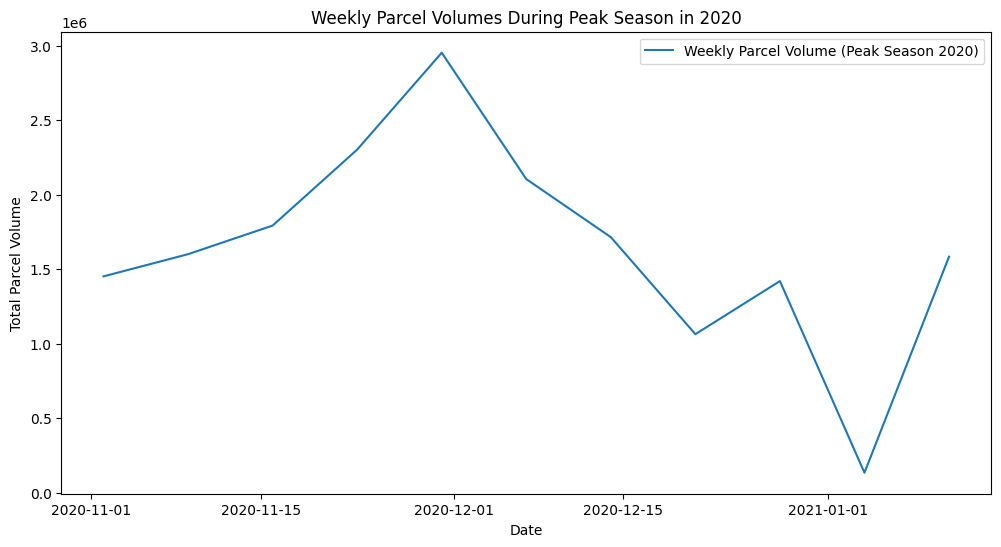

Total Parcel Volume During Peak Season in 2020: 18120361


In [44]:
# Define the peak season period for 2020
peak_season_start = '2020-11-02'
peak_season_end = '2021-01-17'
covid_start = '2020-01-27'

# Convert year and week to datetime for easier filtering
covid_data['DATE'] = pd.to_datetime(covid_data['Year'].astype(str) + covid_data['Week'].astype(str) + '1', format='%G%V%u')

# Filter data for the peak season period in 2020
peak_season_data = covid_data[(covid_data['DATE'] >= peak_season_start) & (covid_data['DATE'] <= peak_season_end)]

# Group data by week and calculate total parcel volumes for the peak season
weekly_peak_volumes = peak_season_data.groupby('DATE')['Parcels_Shipped'].sum()

# Plot weekly parcel volumes during the peak season in 2020
plt.figure(figsize=(12, 6))
plt.plot(weekly_peak_volumes, label='Weekly Parcel Volume (Peak Season 2020)')
plt.title('Weekly Parcel Volumes During Peak Season in 2020')
plt.xlabel('Date')
plt.ylabel('Total Parcel Volume')
plt.legend()
plt.show()

# Calculate total parcel volume during the peak season in 2020
total_peak_volume_2020 = weekly_peak_volumes.sum()

print(f"Total Parcel Volume During Peak Season in 2020: {total_peak_volume_2020}")

### The Impact of COVID on Customer Segments:
##### •	How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?

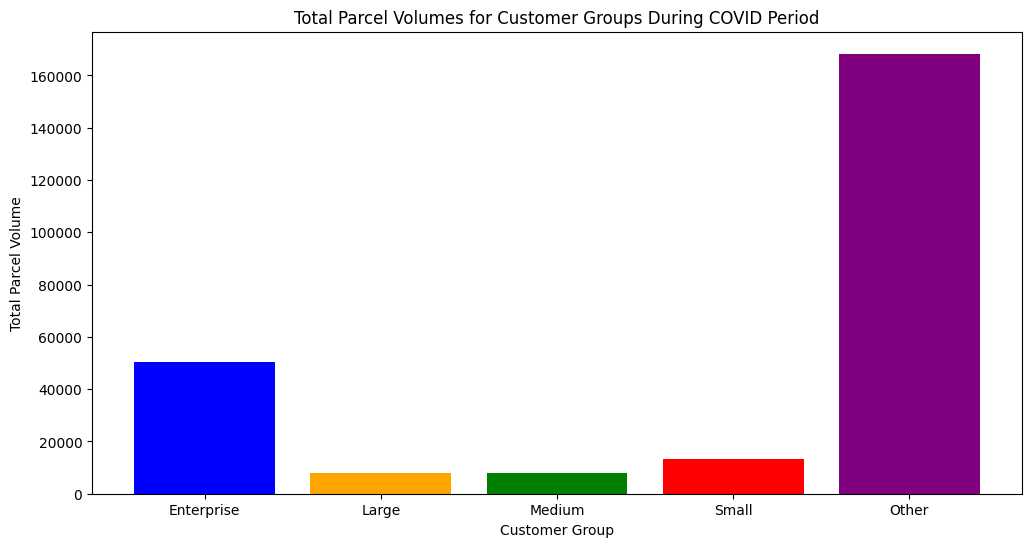

Total Parcel Volumes for Customer Groups During COVID Period:
Enterprise: 50306
Large: 7915
Medium: 7838
Small: 13212
Other: 168290


In [45]:
# Defining customer groups
customer_groups = {
    'Enterprise': [718117, 317344, 226167],
    'Large': [285685, 684937, 833033],
    'Medium': [451525, 642870, 726326],
    'Small': [188710, 380778, 379351],
    'Other': [786581, 810116, 854872]
}

# Function to calculate total volumes for each customer group during COVID period
def calculate_group_volumes(group_ids):
    group_data = covid_data[covid_data['CustomerID'].isin(group_ids)]
    covid_data1 = group_data[group_data['DATE'] >= '2020-01-27']
    total_volume = covid_data1['Parcels_Shipped'].sum()
    return total_volume

# Calculate total volumes for each customer group
group_volumes = {group: calculate_group_volumes(ids) for group, ids in customer_groups.items()}

# Plot total volumes for each customer group during COVID period
plt.figure(figsize=(12, 6))
plt.bar(group_volumes.keys(), group_volumes.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Total Parcel Volumes for Customer Groups During COVID Period')
plt.xlabel('Customer Group')
plt.ylabel('Total Parcel Volume')
plt.show()

print("Total Parcel Volumes for Customer Groups During COVID Period:")
for group, volume in group_volumes.items():
    print(f"{group}: {volume}")

##### •	What percent of each customer group is growing, moderately growing, and declining during the COVID observation period? 

Industry Standard Growth Rate (ISGR): 39.10%

Percentage of Customers in Each Growth Category:
Growth_Category
Growing               38.910134
Declining             37.954111
Moderately Growing    23.135755
Name: proportion, dtype: float64


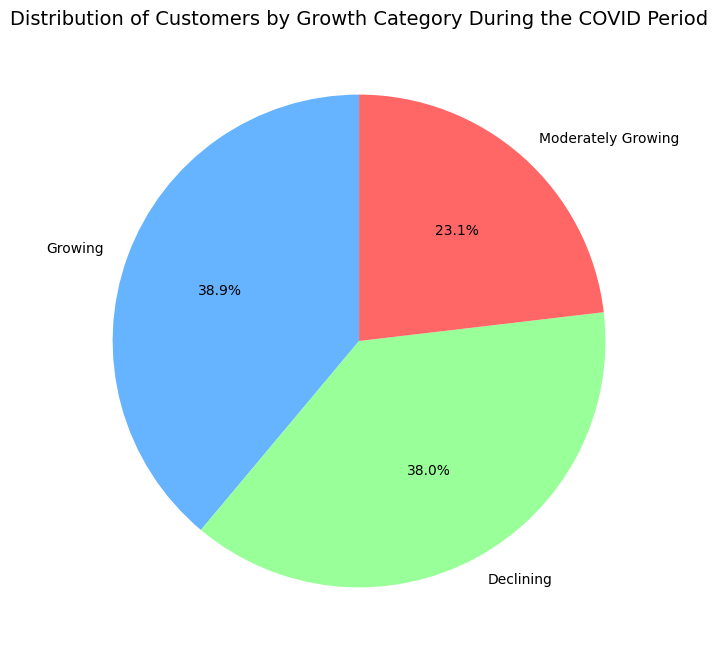

In [46]:
data_2019 = covid_data[covid_data['Year'] == 2019]
data_2020 = covid_data[(covid_data['Year'] == 2020)]

# Calculate total parcels for each customer in 2019 (Pre-COVID) and 2020 (COVID)
data_2019_total = data_2019.groupby('CustomerID')['Parcels_Shipped'].sum().reset_index()
data_2020_total = data_2020.groupby('CustomerID')['Parcels_Shipped'].sum().reset_index()

# Merge 2019 and 2020 data on CustomerID
customer_data = pd.merge(data_2019_total, data_2020_total, on='CustomerID', suffixes=('_2019', '_2020'))

# Calculate the growth rate for each customer
customer_data['Growth_Rate'] = ((customer_data['Parcels_Shipped_2020'] - customer_data['Parcels_Shipped_2019']) / customer_data['Parcels_Shipped_2019']) * 100

# Define growth categories based on growth rate
def categorize_growth(rate, isgr):
    if rate > isgr:
        return 'Growing'
    elif 0 <= rate <= isgr:
        return 'Moderately Growing'
    else:
        return 'Declining'

# Estimate ISGR by comparing pre-COVID (2019) volume to COVID (2020) volume
total_2019 = data_2019['Parcels_Shipped'].sum()
total_2020 = data_2020['Parcels_Shipped'].sum()

ISGR = ((total_2020 - total_2019) / total_2019) * 100  # Industry Standard Growth Rate

# Apply categorization to each customer
customer_data['Growth_Category'] = customer_data['Growth_Rate'].apply(categorize_growth, isgr=ISGR)

# Calculate the percentage of customers in each category (Growing, Moderately Growing, Declining)
growth_counts = customer_data['Growth_Category'].value_counts(normalize=True) * 100

# Print the results
print(f"Industry Standard Growth Rate (ISGR): {ISGR:.2f}%")
print("\nPercentage of Customers in Each Growth Category:")
print(growth_counts)

# Plot the results as a pie chart
growth_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff6666'], figsize=(8, 8), startangle=90)
plt.title('Distribution of Customers by Growth Category During the COVID Period', fontsize=14)
plt.ylabel('')
plt.show()

##### •	What percent of each customer group are new customers during the COVID observation period? 

In [47]:
# Categorization function for customer groups (adjust logic as needed)
def categorize_customer(row):
    if row['Parcels_Shipped'] > 1000:
        return 'Enterprise'
    elif row['Parcels_Shipped'] > 500:
        return 'Large'
    elif row['Parcels_Shipped'] > 100:
        return 'Medium'
    else:
        return 'Small'

# Add customer group column
covid_data['CustomerGroup'] = covid_data.apply(categorize_customer, axis=1)

# Separate data into 2019 and 2020
data_2019 = covid_data[covid_data['Year'] == 2019]
data_2020 = covid_data[covid_data['Year'] == 2020]

# Identify unique customers in 2019 and 2020
customers_2019 = set(data_2019['CustomerID'])
customers_2020 = set(data_2020['CustomerID'])

# Find new customers (in 2020 but not in 2019)
new_customers = customers_2020 - customers_2019

# Mark new customers in 2020 data
data_2020['NewCustomer'] = data_2020['CustomerID'].apply(lambda x: x in new_customers)

# Group by CustomerGroup and calculate counts
grouped_2020 = data_2020.groupby('CustomerGroup').agg(
    TotalCustomers=('CustomerID', 'nunique'),
    NewCustomers=('NewCustomer', 'sum')
).reset_index()

# Calculate the percentage of new customers
grouped_2020['NewCustomerPercentage'] = (grouped_2020['NewCustomers'] / grouped_2020['TotalCustomers']) * 100

# Display results
print(grouped_2020)

  CustomerGroup  TotalCustomers  NewCustomers  NewCustomerPercentage
0    Enterprise             203             0                    0.0
1         Large             305             0                    0.0
2        Medium             771             0                    0.0
3         Small             938             0                    0.0


C:\Users\HP\AppData\Local\Temp\ipykernel_12720\3625858469.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['NewCustomer'] = data_2020['CustomerID'].apply(lambda x: x in new_customers)


##### •	What percent of 2019 customers in each group did we lose during the COVID observation period?

In [48]:
# Categorization function for customer groups
def categorize_customer(row):
    if row['Parcels_Shipped'] > 1000:
        return 'Enterprise'
    elif row['Parcels_Shipped'] > 500:
        return 'Large'
    elif row['Parcels_Shipped'] > 100:
        return 'Medium'
    else:
        return 'Small'

# Add customer group column
covid_data['CustomerGroup'] = covid_data.apply(categorize_customer, axis=1)

# Separate data into 2019 and 2020
data_2019 = covid_data[covid_data['Year'] == 2019]
data_2020 = covid_data[covid_data['Year'] == 2020]

# Identify unique customers by year
customers_2019 = set(data_2019['CustomerID'])
customers_2020 = set(data_2020['CustomerID'])

# Find lost customers (in 2019 but not in 2020)
lost_customers = customers_2019 - customers_2020

# Mark lost customers in 2019 data
data_2019['LostCustomer'] = data_2019['CustomerID'].apply(lambda x: x in lost_customers)

# Group by CustomerGroup and calculate counts
grouped_2019 = data_2019.groupby('CustomerGroup').agg(
    TotalCustomers=('CustomerID', 'nunique'),
    LostCustomers=('LostCustomer', 'sum')
).reset_index()

# Calculate the percentage of lost customers
grouped_2019['LostCustomerPercentage'] = (grouped_2019['LostCustomers'] / grouped_2019['TotalCustomers']) * 100

# Display results
print(grouped_2019)


  CustomerGroup  TotalCustomers  LostCustomers  LostCustomerPercentage
0    Enterprise             158              6                3.797468
1         Large             222              8                3.603604
2        Medium             705             67                9.503546
3         Small             944            280               29.661017


C:\Users\HP\AppData\Local\Temp\ipykernel_12720\1469614830.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019['LostCustomer'] = data_2019['CustomerID'].apply(lambda x: x in lost_customers)


##### •	What was the overall impact of COVID on volumes and revenue by customer group?

In [49]:
# Aggregate total volume and revenue by year and customer group
volume_summary = covid_data.groupby(['CustomerGroup', 'Year']).agg(
    TotalVolume=('Parcels_Shipped', 'sum')
).reset_index()
# Separate 2019 and 2020 data for comparison
volume_2019 = volume_summary[volume_summary['Year'] == 2019]
volume_2020 = volume_summary[volume_summary['Year'] == 2020]

In [50]:
# Merge 2019 and 2020 data
comparison = pd.merge(
    volume_2019[['CustomerGroup', 'TotalVolume']],
    volume_2020[['CustomerGroup', 'TotalVolume']],
    on='CustomerGroup',
    suffixes=('_2019', '_2020'),
    how='outer'
).fillna(0)  # Fill missing values with 0 for groups not present in one year

# Calculate volume change percentage
comparison['VolumeChangePercent'] = (
    (comparison['TotalVolume_2020'] - comparison['TotalVolume_2019'])
    / comparison['TotalVolume_2019']
) * 100

# Assume revenue proportional to volume (if no revenue data provided)
comparison['RevenueChangePercent'] = comparison['VolumeChangePercent']

# Display results
print(comparison)

  CustomerGroup  TotalVolume_2019  TotalVolume_2020  VolumeChangePercent  \
0    Enterprise          47819899          67634171            41.435203   
1         Large           1147668           1575091            37.242739   
2        Medium           2453800           3056552            24.564023   
3         Small           1401747           1209876           -13.687991   

   RevenueChangePercent  
0             41.435203  
1             37.242739  
2             24.564023  
3            -13.687991  
